## The Data

The original dataset that was used for this project is from the University of Wisconsin Madison's yearly county health rankings and outcomes data. 
Since much of this data is county data, US census data was necessary to use county populations to make sense of the health data. The dataset that is imported into this document is an already combined dataset from the two datasets using sheets. 


## Importing the Proper Packages

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
import plotly.express as px

## Importing the Data

In [57]:
all_data = pd.read_csv("Data_sorted_through_counties - Sheet3.csv")

all_data.head()

,State,County,% Adults with Obesity,Food Environment Index,% Physically Inactive,# Limited Access to Healthy Foods,% Frequent Physical Distress,% Frequent Mental Distress,% With Access to Exercise Opportunities,Life Expectancy,...,# Uninsured Adults,% Excessive Drinking,Unnamed: 13,Unnamed: 14,Unnamed: 15,STNAME,CTYNAME,POPESTIMATE2022,Unnamed: 19,TRUE
0,Alabama,NaN,39.0,5.3,28.0,418731.0,11.0,16.0,61.0,74.8,...,424832.0,16.0,NaN,NaN,NaN,Alabama,Alabama,5074296.0,NaN,False
1,Alabama,Autauga,37.0,6.6,26.0,7106.0,11.0,16.0,56.0,76.6,...,4434.0,17.0,NaN,NaN,NaN,Alabama,Autauga,59759.0,NaN,True
2,Alabama,Baldwin,33.0,7.5,23.0,14466.0,10.0,16.0,66.0,77.7,...,17707.0,19.0,NaN,NaN,NaN,Alabama,Baldwin,246435.0,NaN,True
3,Alabama,Barbour,46.0,5.8,36.0,2865.0,15.0,18.0,55.0,72.9,...,2169.0,13.0,NaN,NaN,NaN,Alabama,Barbour,24706.0,NaN,True
4,Alabama,Bibb,38.0,7.4,32.0,102.0,13.0,17.0,18.0,73.6,...,1937.0,16.0,NaN,NaN,NaN,Alabama,Bibb,22005.0,NaN,True


## Cleaning the Data

In [58]:
# The "True" column gives the value True if the conty is included in both the health dataset and the populating dataset.
# The following command uses the "True" column to sort the data so that is only contains data about counties that are included in both data sets

obesity_df = all_data[all_data["TRUE"] == True]
obesity_df.head()

,State,County,% Adults with Obesity,Food Environment Index,% Physically Inactive,# Limited Access to Healthy Foods,% Frequent Physical Distress,% Frequent Mental Distress,% With Access to Exercise Opportunities,Life Expectancy,...,# Uninsured Adults,% Excessive Drinking,Unnamed: 13,Unnamed: 14,Unnamed: 15,STNAME,CTYNAME,POPESTIMATE2022,Unnamed: 19,TRUE
1,Alabama,Autauga,37.0,6.6,26.0,7106.0,11.0,16.0,56.0,76.6,...,4434.0,17.0,NaN,NaN,NaN,Alabama,Autauga,59759.0,NaN,True
2,Alabama,Baldwin,33.0,7.5,23.0,14466.0,10.0,16.0,66.0,77.7,...,17707.0,19.0,NaN,NaN,NaN,Alabama,Baldwin,246435.0,NaN,True
3,Alabama,Barbour,46.0,5.8,36.0,2865.0,15.0,18.0,55.0,72.9,...,2169.0,13.0,NaN,NaN,NaN,Alabama,Barbour,24706.0,NaN,True
4,Alabama,Bibb,38.0,7.4,32.0,102.0,13.0,17.0,18.0,73.6,...,1937.0,16.0,NaN,NaN,NaN,Alabama,Bibb,22005.0,NaN,True
5,Alabama,Blount,33.0,7.8,29.0,1440.0,12.0,17.0,41.0,74.2,...,5607.0,16.0,NaN,NaN,NaN,Alabama,Blount,59512.0,NaN,True


In [59]:
# Drop columns that will not be used

obesity_df = obesity_df.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'STNAME', 'CTYNAME', 'Unnamed: 19', 'TRUE'], axis = 1)
obesity_df.head(5)

,State,County,% Adults with Obesity,Food Environment Index,% Physically Inactive,# Limited Access to Healthy Foods,% Frequent Physical Distress,% Frequent Mental Distress,% With Access to Exercise Opportunities,Life Expectancy,Median Household Income,# Uninsured Adults,% Excessive Drinking,POPESTIMATE2022
1,Alabama,Autauga,37.0,6.6,26.0,7106.0,11.0,16.0,56.0,76.6,66444.0,4434.0,17.0,59759.0
2,Alabama,Baldwin,33.0,7.5,23.0,14466.0,10.0,16.0,66.0,77.7,65658.0,17707.0,19.0,246435.0
3,Alabama,Barbour,46.0,5.8,36.0,2865.0,15.0,18.0,55.0,72.9,38649.0,2169.0,13.0,24706.0
4,Alabama,Bibb,38.0,7.4,32.0,102.0,13.0,17.0,18.0,73.6,48454.0,1937.0,16.0,22005.0
5,Alabama,Blount,33.0,7.8,29.0,1440.0,12.0,17.0,41.0,74.2,56894.0,5607.0,16.0,59512.0


In [60]:
# Drop the rows that have missing values

obesity_df = obesity_df.dropna(axis = 0)
obesity_df.shape

(2968, 14)

In [61]:
# Change all of the columns that have counts to percentages using the county populations

obesity_df['# Limited Access to Healthy Foods'] = (obesity_df['# Limited Access to Healthy Foods'] / obesity_df['POPESTIMATE2022']) * 100

obesity_df['# Uninsured Adults'] = (obesity_df['# Uninsured Adults'] / obesity_df['POPESTIMATE2022']) * 100

obesity_df = obesity_df.rename(columns = {
    '# Limited Access to Healthy Foods':'% Limited Access to Healthy Foods',
    '# Uninsured Adults':'% Uninsured Adults'
})

In [62]:
## Drop rows that contain percentages over 100

obesity_df = obesity_df[obesity_df['% Limited Access to Healthy Foods']  <= 100]

obesity_df = obesity_df[obesity_df['% Uninsured Adults'] <= 100]


In [79]:
## Export cleaned dataframe to a csv file for use in other files

obesity_df.to_csv('cleaned_obesity_data.csv')

## Exploratory Data Analysis

[Text(0.5, 1.0, '% Adults with Obesity vs. Food Environment Index')]

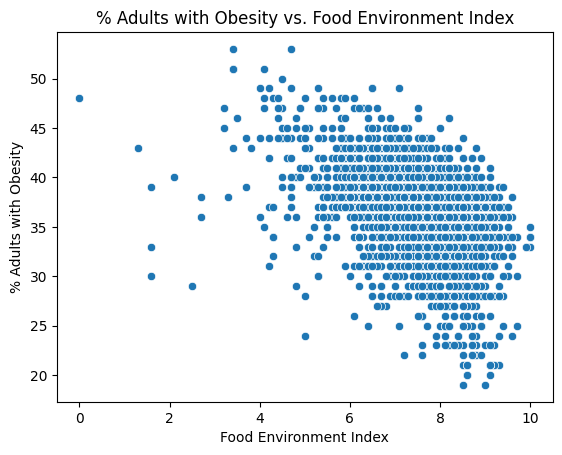

In [63]:
sns.scatterplot(data = obesity_df, x = 'Food Environment Index', y = '% Adults with Obesity').set(title = "% Adults with Obesity vs. Food Environment Index")


The above plot shows that a higher food environment index is generally associated with a lower obesity rate. However, the correlation does not appear to be perfectly linear. The food environment index is a mearsure between 1 and 10 that combines both proximity to healthy food and cost barriers to healthy food. A higher food envirnment index signifies an environment were there is easier access to healthy food both in proximity and financially. Therefore, it makes sense that a low food environment index is associated with higher obesity rates. In such counties, residents may only be able to afford fast food rather than fresh and healthy foods from a supermarket. 

[Text(0.5, 1.0, '% Adults with Obesity vs. % Physically Inactive')]

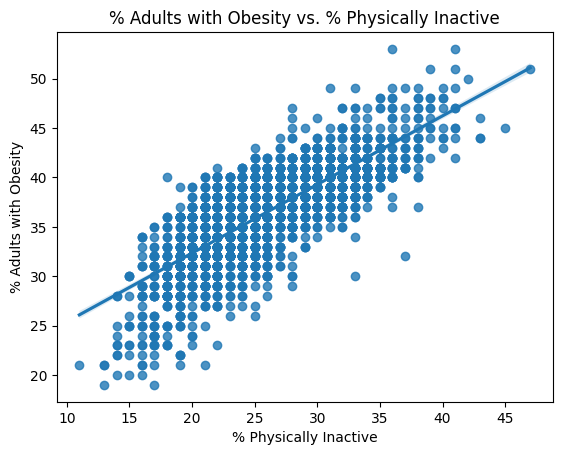

In [64]:
sns.regplot(data = obesity_df, x = '% Physically Inactive', y = '% Adults with Obesity').set(title = '% Adults with Obesity vs. % Physically Inactive')


The above plot shows that there is a pretty linear correlation between physical inactivity and obesity rates. This is not surprising considering physical inactivity is a well known risk factor for obesity.

<Axes: xlabel='% Limited Access to Healthy Foods', ylabel='% Adults with Obesity'>

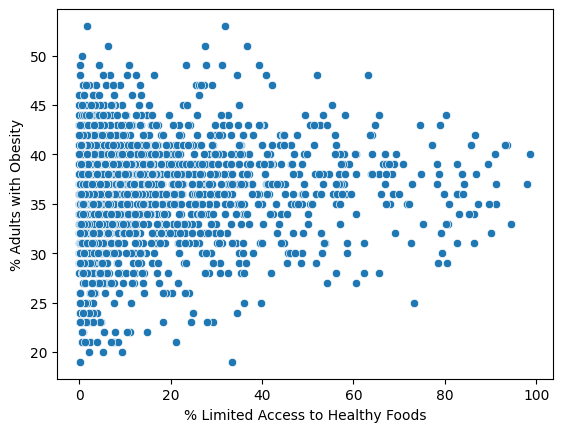

In [65]:
sns.scatterplot(data = obesity_df, x = '% Limited Access to Healthy Foods', y = '% Adults with Obesity')

There does not seem to be much correlation between the percent with limited access to healthy foods and obesity rates. This is surprising considering the food environment index showed some correlation.

<Axes: xlabel='% Frequent Physical Distress', ylabel='% Adults with Obesity'>

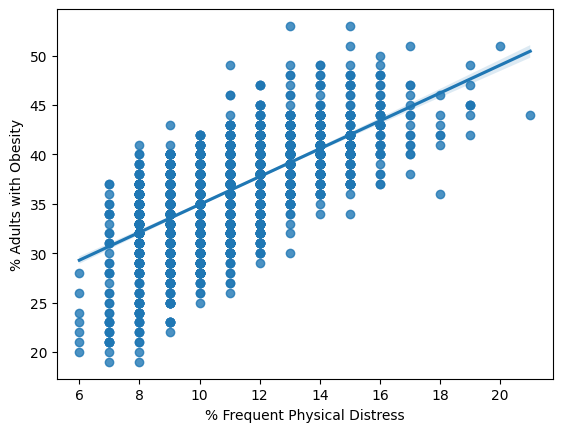

In [66]:
sns.regplot(data = obesity_df, x = '% Frequent Physical Distress', y = '% Adults with Obesity')

[Text(0.5, 1.0, '% of Adults with Obesity on % Frequent Distress')]

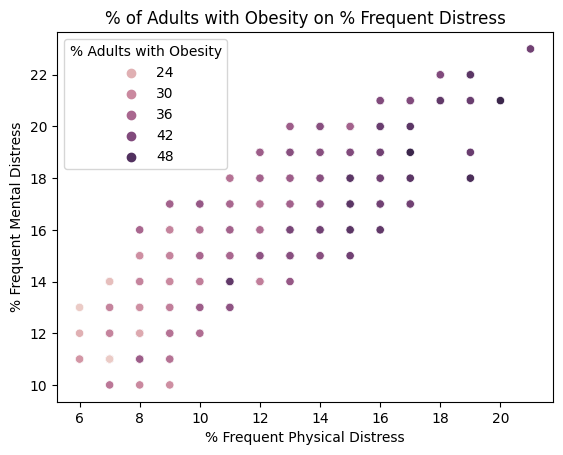

In [67]:
sns.scatterplot(data = obesity_df, x = '% Frequent Physical Distress', y = '% Frequent Mental Distress', hue = '% Adults with Obesity').set(title = "% of Adults with Obesity on % Frequent Distress")

The above plot shows that mental and physical distress not only correlate with each other but also correlate with obesity rates. The plot shows that obesity rates correlate with physical distress slightly more than they do with mental distress. 

[Text(0.5, 1.0, '% Adults with Obesity vs. % Frequent Physical Distress')]

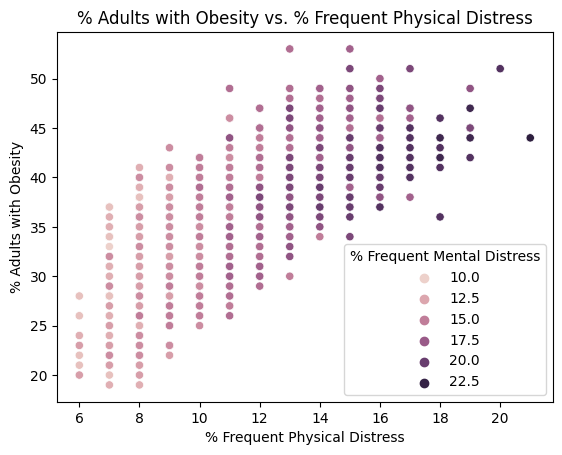

In [68]:
sns.scatterplot(data = obesity_df, x = '% Frequent Physical Distress', y = '% Adults with Obesity', hue = '% Frequent Mental Distress').set(
    title = "% Adults with Obesity vs. % Frequent Physical Distress"
)

Since frequent mental and physical distress show clear vertical lines in the scatter plots, they will also be represented in a barplot as categorical variables.

<Axes: xlabel='% Frequent Physical Distress', ylabel='% Adults with Obesity'>

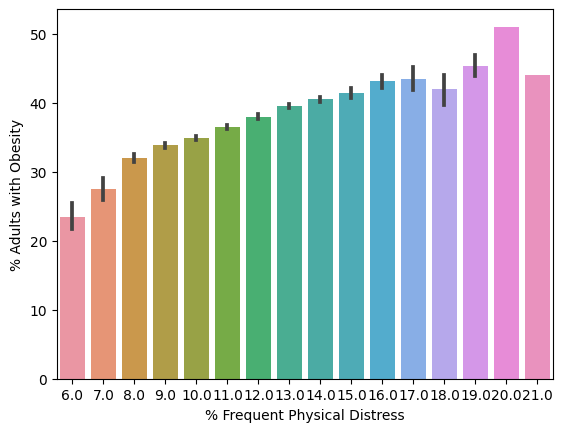

In [69]:
sns.barplot(data = obesity_df, x = '% Frequent Physical Distress', y = '% Adults with Obesity')

<Axes: xlabel='% Frequent Mental Distress', ylabel='% Adults with Obesity'>

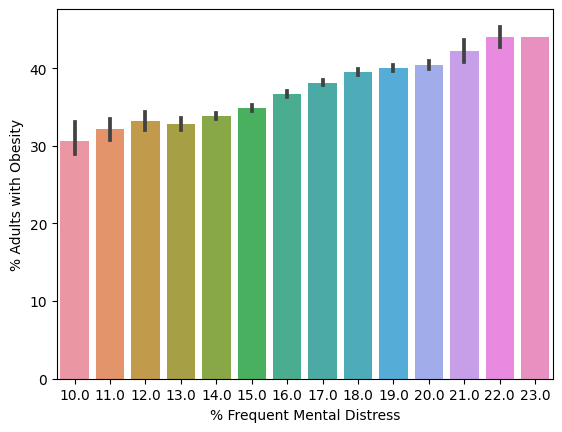

In [70]:
sns.barplot(data = obesity_df, x = '% Frequent Mental Distress', y = '% Adults with Obesity')

Similar insights are found in the barplots as in the scatterplots. 

<Axes: xlabel='% With Access to Exercise Opportunities', ylabel='% Adults with Obesity'>

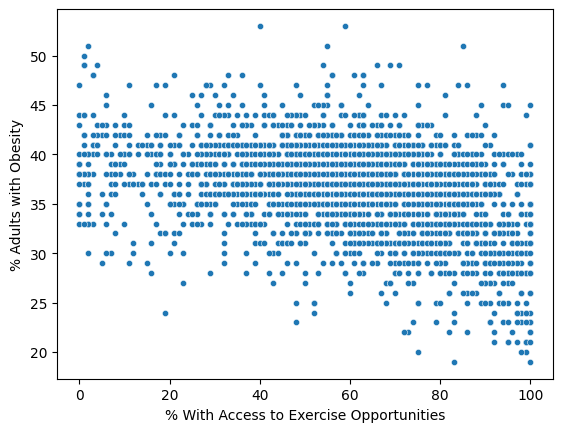

In [71]:
sns.scatterplot(data = obesity_df, x = '% With Access to Exercise Opportunities', y = '% Adults with Obesity', s = 20)

The above plot shows a slight negative correlation between access to exercise opportunity and obesity rates. This especially makes sense because there was a clear correlation between physical inactivity and obesity. 

[Text(0.5, 1.0, '% Adults with Obesity vs. Life Expectancy')]

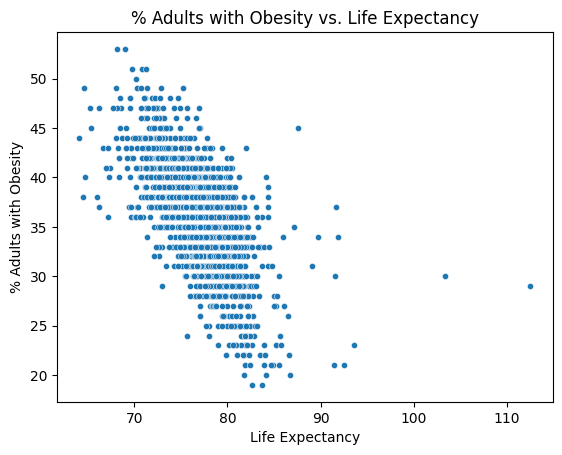

In [72]:
sns.scatterplot(data = obesity_df, x = 'Life Expectancy', y = '% Adults with Obesity', s = 20).set(title = "% Adults with Obesity vs. Life Expectancy")

The above plot shows a significant negative correlation between obesity rate and life expectancy.

In [73]:
obesity_df[obesity_df['Life Expectancy'] > 100]

,State,County,% Adults with Obesity,Food Environment Index,% Physically Inactive,% Limited Access to Healthy Foods,% Frequent Physical Distress,% Frequent Mental Distress,% With Access to Exercise Opportunities,Life Expectancy,Median Household Income,% Uninsured Adults,% Excessive Drinking,POPESTIMATE2022
69,Alaska,Aleutians East,29.0,7.3,28.0,13.478517,9.0,10.0,11.0,112.5,71492.0,17.922307,16.0,3398.0
216,California,Mono,30.0,6.9,19.0,28.762778,10.0,15.0,70.0,103.3,70945.0,13.347433,23.0,8511.0


The above counties have life expectancies well over 100 and are clear outliers. However, after further research the life expectanies of Aleutians East County, Alaska and Mono County, California are in fact accurate. 

Something interesting to take note of is the fact that the two outlier counties still have obesity rates near 30% despite the extraordinarily high life expectancies. 

[Text(0.5, 1.0, '% Adults with Obesity vs. Median Household Income'),
 Text(0.5, 0, 'Median Household Income ($ Per Year)')]

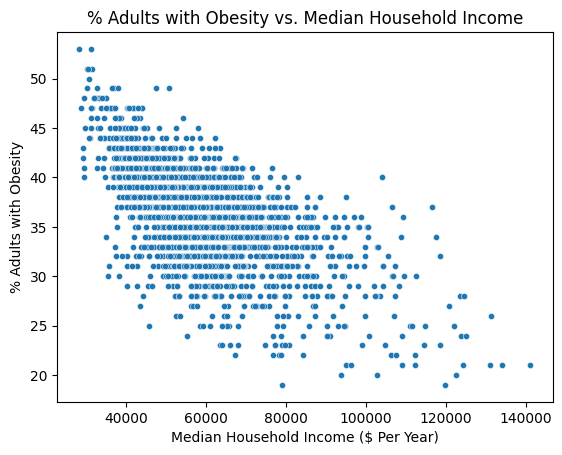

In [74]:
sns.scatterplot(data = obesity_df, x = 'Median Household Income', y = '% Adults with Obesity', s = 20).set(
    title = "% Adults with Obesity vs. Median Household Income",
    xlabel = 'Median Household Income ($ Per Year)'
)

The above plot shows a negative correlation between obesity rate and median household income.

<Axes: xlabel='% Uninsured Adults', ylabel='% Adults with Obesity'>

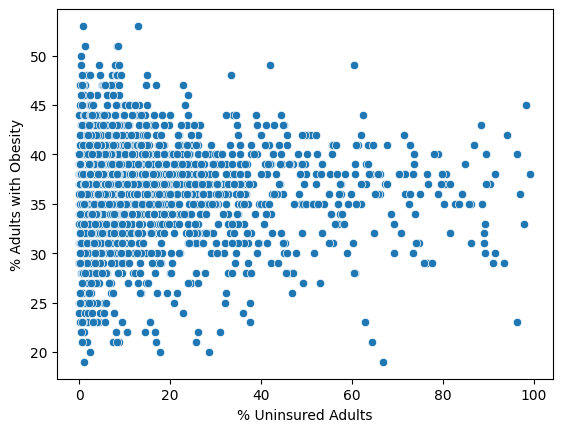

In [75]:
sns.scatterplot(data = obesity_df, x = '% Uninsured Adults', y = '% Adults with Obesity')

<Axes: xlabel='% Excessive Drinking', ylabel='% Adults with Obesity'>

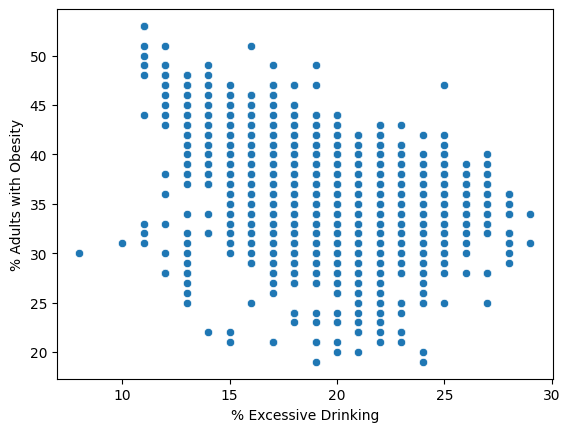

In [76]:
sns.scatterplot(data = obesity_df, x = '% Excessive Drinking', y = '% Adults with Obesity')

### Map of Average Obesity Rate per State

In [77]:
## Average obesity rate per state

States = list(obesity_df['State'].unique())
#print(States)
avg_obesity_rates = []


for state in States:
    obesity_rate = mean(obesity_df[obesity_df['State'] == state]['% Adults with Obesity'])
    avg_obesity_rates.append(obesity_rate)

avg_obesity_rates = list(avg_obesity_rates)

State_obesity_rates_df = pd.DataFrame(States, avg_obesity_rates)

State_obesity_rates_df.reset_index(inplace=True)

State_obesity_rates_df.columns = ['avg_obesity_rate', 'State']

State_obesity_rates_df['Code'] = State_obesity_rates_df['State'].map({'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'})

State_obesity_rates_df.head()

,avg_obesity_rate,State,Code
0,41.045455,Alabama,AL
1,33.470588,Alaska,AK
2,33.500000,Arizona,AZ
3,39.140845,Arkansas,AR
4,30.127660,California,CA


In [78]:
fig = px.choropleth(State_obesity_rates_df, 
              locations = 'Code', 
              locationmode = "USA-states", 
              scope = "usa",
              color = 'avg_obesity_rate',
              color_continuous_scale="Viridis_r")

fig.update_layout(
      title_text = 'Average % of Adults with Obesity by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      
         )

fig.show()

The map of average obesity rates in the US shows that the states that are part of the american south, speciafically Alabama, Mississippi, and Lousiniana suffer from some of the highest obesity rates in the country. On the other hand, Colorado and Massachussetts seem to have significantly lower obesity rates compared to the rest of the nation.